# Набор данных о здоровье сна и образе жизни

In [1]:
!jt -l 

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [45]:
!jt -t onedork -T -N -kl -cellw 100%

In [9]:
!jt -t chesterish -fs 110 -tfs 11 -nfs 115 -cellw 98% -T -kl

# -t chesterish: устанавливает тему на "честерский"
# -fs 100: устанавливает размер шрифта на 100%
# -altp: включает альтернативный макет приглашения
# -tfs 11: устанавливает размер шрифта значка панели инструментов на 11pt.
# -nfs 115: устанавливает размер шрифта имени ноутбука на 115%
# -cellw 98%: устанавливает ширину ячейки на 98%
# -T: показывает панель инструментов
# -N: показывает имя блокнота
# -kl: включает логотип ядра



In [39]:
from jupyter_core.paths import jupyter_config_dir, jupyter_config_path

# Путь к каталогу конфигурации
# по умолчанию
print(jupyter_config_dir())

# Путь к файлу конфигурации,
# если он существует
print(jupyter_config_path())

C:\Users\lazar\.jupyter
['C:\\Users\\lazar\\.jupyter', 'C:\\Users\\lazar\\AppData\\Roaming\\Python\\etc\\jupyter', 'E:\\Program Files\\anaconda3\\envs\\New_netology\\etc\\jupyter', 'C:\\ProgramData\\jupyter']


In [40]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\lazar\AppData\Local\Temp\ipykernel_17200\912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


**Столбцы набора данных:**

Person ID: идентификатор для каждого человека.

Gender: Пол человека (мужской/женский).

Age: возраст человека в годах.

Occupation: Род занятий или профессия человека.

Sleep Duration (hours): количество часов, которое человек спит в день.

Quality of Sleep (scale: 1-10): Субъективная оценка качества сна в диапазоне от 1 до 10.

Physical Activity Level (minutes/day): количество минут, в течение которых человек ежедневно занимается физической активностью.

Stress Level (scale: 1-10): Субъективная оценка уровня стресса, испытываемого человеком, в диапазоне от 1 до 10.

BMI Category: Категория ИМТ человека (например, недостаточный вес, нормальный вес, избыточный вес).

Blood Pressure (systolic/diastolic): Измерение артериального давления человека, выраженное как превышение систолического давления над диастолическим давлением.

Heart Rate (bpm): частота сердечных сокращений человека в состоянии покоя в ударах в минуту.

Daily Steps: количество шагов, которые человек делает в день.

Sleep Disorder: наличие или отсутствие нарушения сна у человека (нет, бессонница, апноэ во сне).


**Подробная информация о колонке «Расстройство сна»:**  
None: у человека нет каких-либо специфических нарушений сна.
Insomnia: человек испытывает трудности с засыпанием или сном, что приводит к неадекватному или некачественному сну.
Sleep Apnea: человек страдает от пауз в дыхании во время сна, что приводит к нарушению режима сна и потенциальному риску для здоровья.

Ссылка на данные - (https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv)

In [6]:
print(pd.__file__)

E:\Program Files\anaconda3\envs\New_netology\Lib\site-packages\pandas\__init__.py


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [3]:
# загружаем данные
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [4]:
# смотрим, сколько записей в датасете
df.shape

# в нашем датасете 374 записи с 13 столбцами

(374, 13)

In [5]:
# удалим дублирующие записи и обновим данные о размере данных:
df = df.drop_duplicates()
df.shape

# после проверки видим, что дублирующие записи отсутствуют

(374, 13)

In [14]:
# обработка пропусков
df.isnull().mean() * 100

# в датасете нет пропущенных значений

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [15]:
df.info()
"""
5 - категориальных типов данных,
7 - числовой тип данных
для дальнейшего анализа менять тип данных нет необходимости 
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 40.9+ KB


'\n5 - категориальных типов данных,\n7 - числовой тип данных\nдля дальнейшего анализа менять тип данных нет необходимости \n'

In [19]:
# пердварительный анализ данных
df.describe().round(0)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0
mean,188.0,42.0,7.0,7.0,59.0,5.0,70.0,6817.0
std,108.0,9.0,1.0,1.0,21.0,2.0,4.0,1618.0
min,1.0,27.0,6.0,4.0,30.0,3.0,65.0,3000.0
25%,94.0,35.0,6.0,6.0,45.0,4.0,68.0,5600.0
50%,188.0,43.0,7.0,7.0,60.0,5.0,70.0,7000.0
75%,281.0,50.0,8.0,8.0,75.0,7.0,72.0,8000.0
max,374.0,59.0,8.0,9.0,90.0,8.0,86.0,10000.0


In [20]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Анализ распределения Age, Gender и Occupation

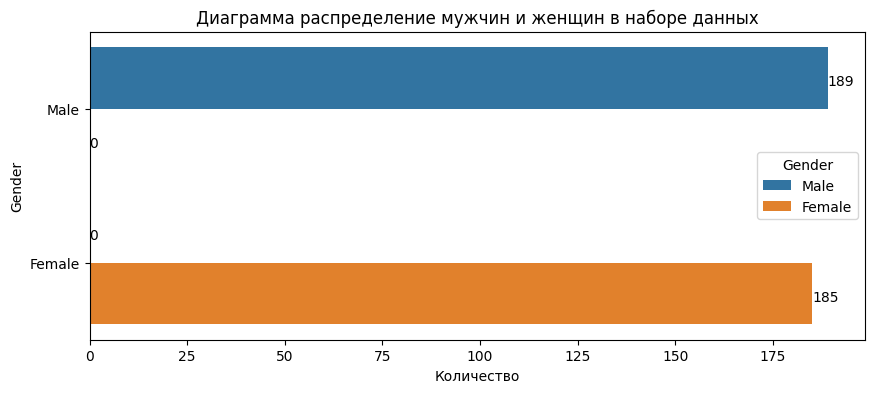

In [26]:
# распределение мужчин и женщин в наборе данных
plt.figure(figsize=(10, 4))
data = sns.countplot(data=df, y = 'Gender', hue="Gender")
for p in data.patches:
    data.annotate(int(p.get_width()), (p.get_width(), p.get_y() + 0.25))

plt.title('Диаграмма распределение мужчин и женщин в наборе данных')
plt.xlabel('Количество')
plt.show()

# видим, что в опросе учавствовало приблизительно одинаковое количество человек

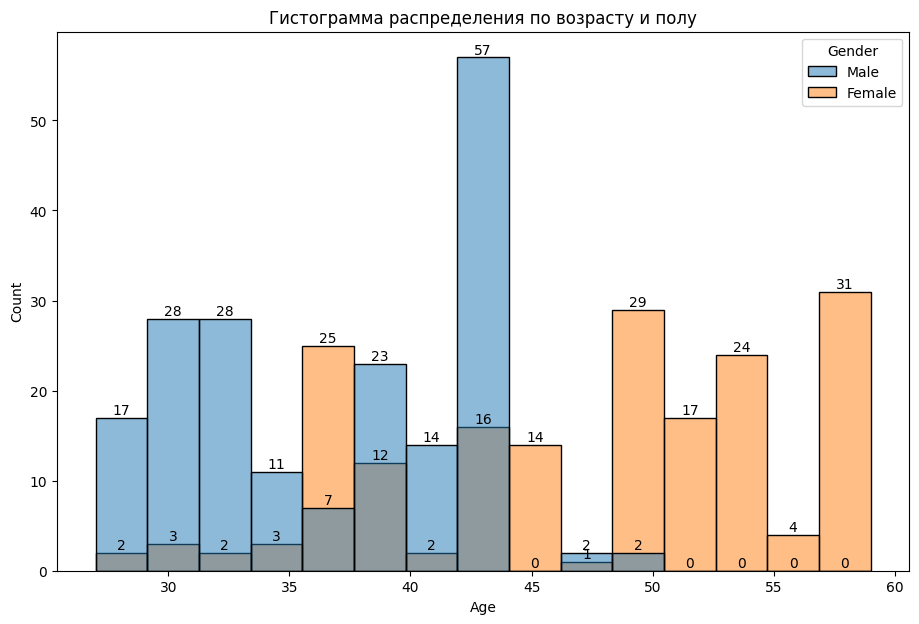

In [27]:
# Строим гистограмму распределения по возрасту и полу для понимания возрастного диапазона в наборе данных мужчин и женщин

data = sns.histplot(df, x="Age", hue="Gender", bins=15)
plt.title('Гистограмма распределения по возрасту и полу')
for p in data.patches:
    data.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Мы видим, что возраст большинства людей находится в диапазоне 43 - 44 лет.
# Так же из гистограммы видно возростное смещение. В наборе данных мужчины более молодого возраста, чем женщины.

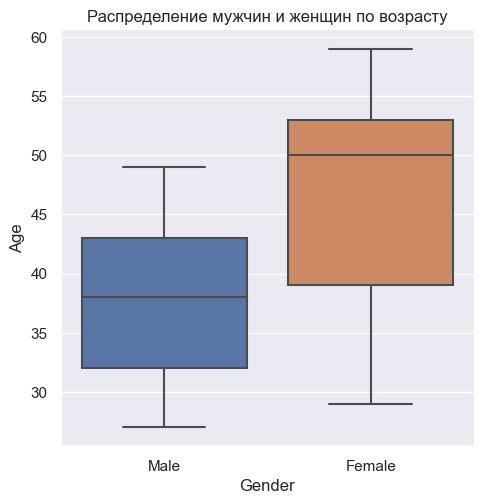

In [334]:
# построим распределение мужчин и женщин по возрасту
data = sns.catplot(data=df, x='Gender', y='Age', kind="box")
plt.title('Распределение мужчин и женщин по возрасту')

plt.show()

# подтверждаем предыдущие выводы о возрасте людей из набора данных
# средний возраст мужчин - 38 лет
# средний возраст женщин 50 лет

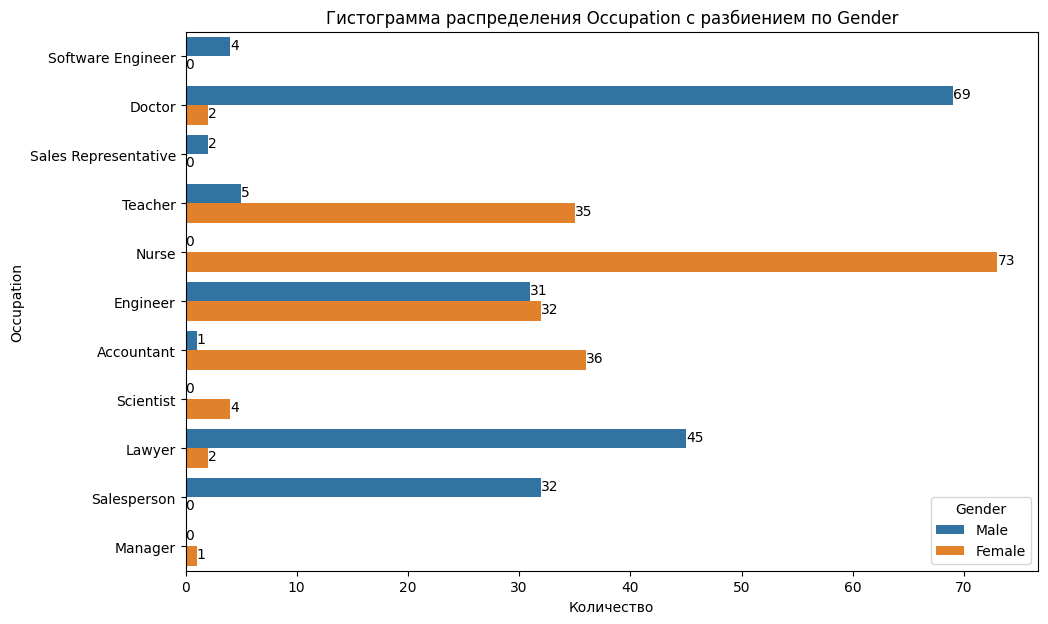

In [28]:
# Построение гистограммы распределения Occupation с разбиением по Gender

data = sns.countplot(data=df, y="Occupation", hue="Gender")
plt.title('Гистограмма распределения Occupation с разбиением по Gender')
plt.xlabel('Количество')
for p in data.patches:
    data.annotate(int(p.get_width()), (p.get_width(), p.get_y() + 0.25))

plt.show()

# род занятий мужского пола доктор, юрист
# род занятий женского пола медсестра и бухгалтер

Анализ показателей

C:\Users\lazar\AppData\Local\Temp\ipykernel_8508\869435010.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Blood Pressure', 'Heart Rate', 'Sleep Disorder']].corr(), annot=True, cmap="YlGnBu")


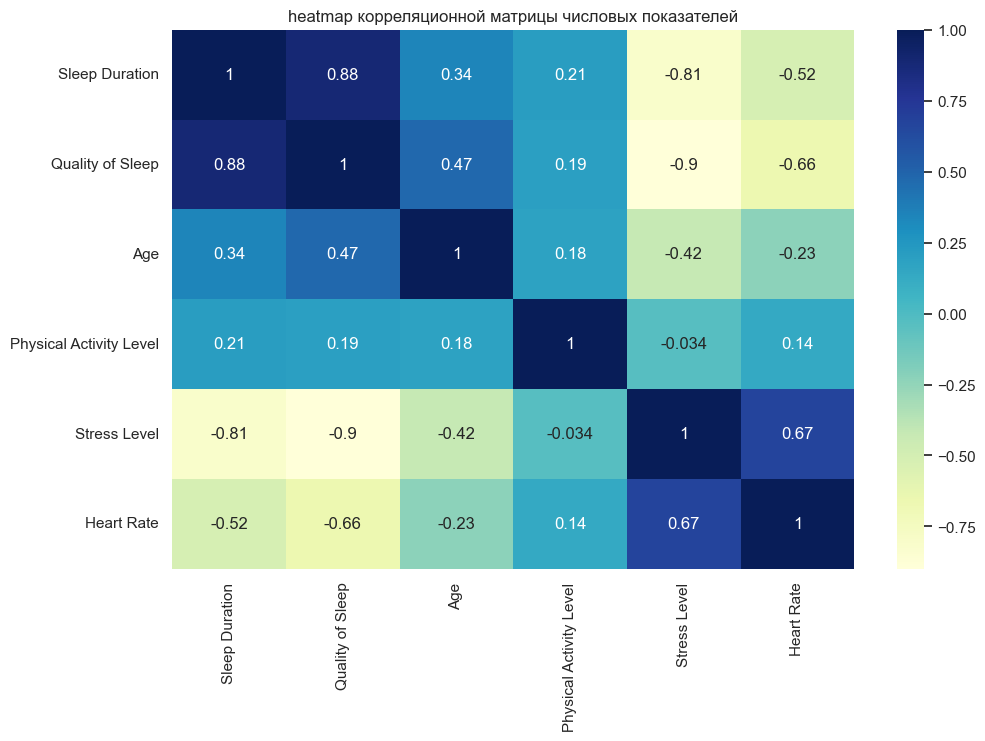

In [283]:
# построение heatmap корреляционной матрицы числовых показателей для определения корреляции между числовыми показателями

sns.heatmap(df[['Sleep Duration', 'Quality of Sleep', 'Age', 'Physical Activity Level', 'Stress Level',
               'Blood Pressure', 'Heart Rate', 'Sleep Disorder']].corr(), annot=True, cmap="YlGnBu")
plt.title('heatmap корреляционной матрицы числовых показателей')
plt.show()

# (0.88) коэффициент корреляции между Sleep Duration - количеством часов, которое человек спит в день и 
# Quality of Sleep - оценкой качества сна. Делаем предположение, что у людей, уделяющих больше времени на сон, качество сна выше

# (-0.81) коэффициент корреляции между Sleep Duration - количеством часов, которое человек спит в день и 
# Stress Level - уровень стресса. Делаем предположение, что у людей, уделяющих меньше времени на сон, уровень стресса больше

# (-0.9) коэффициент корреляции между Quality of Sleep - оценкой качества сна и Stress Level - уровень стресса
# Делаем предположение, что чем лучше качество сна, тем меньше уровень стреса.

<Figure size 1000x1000 with 0 Axes>

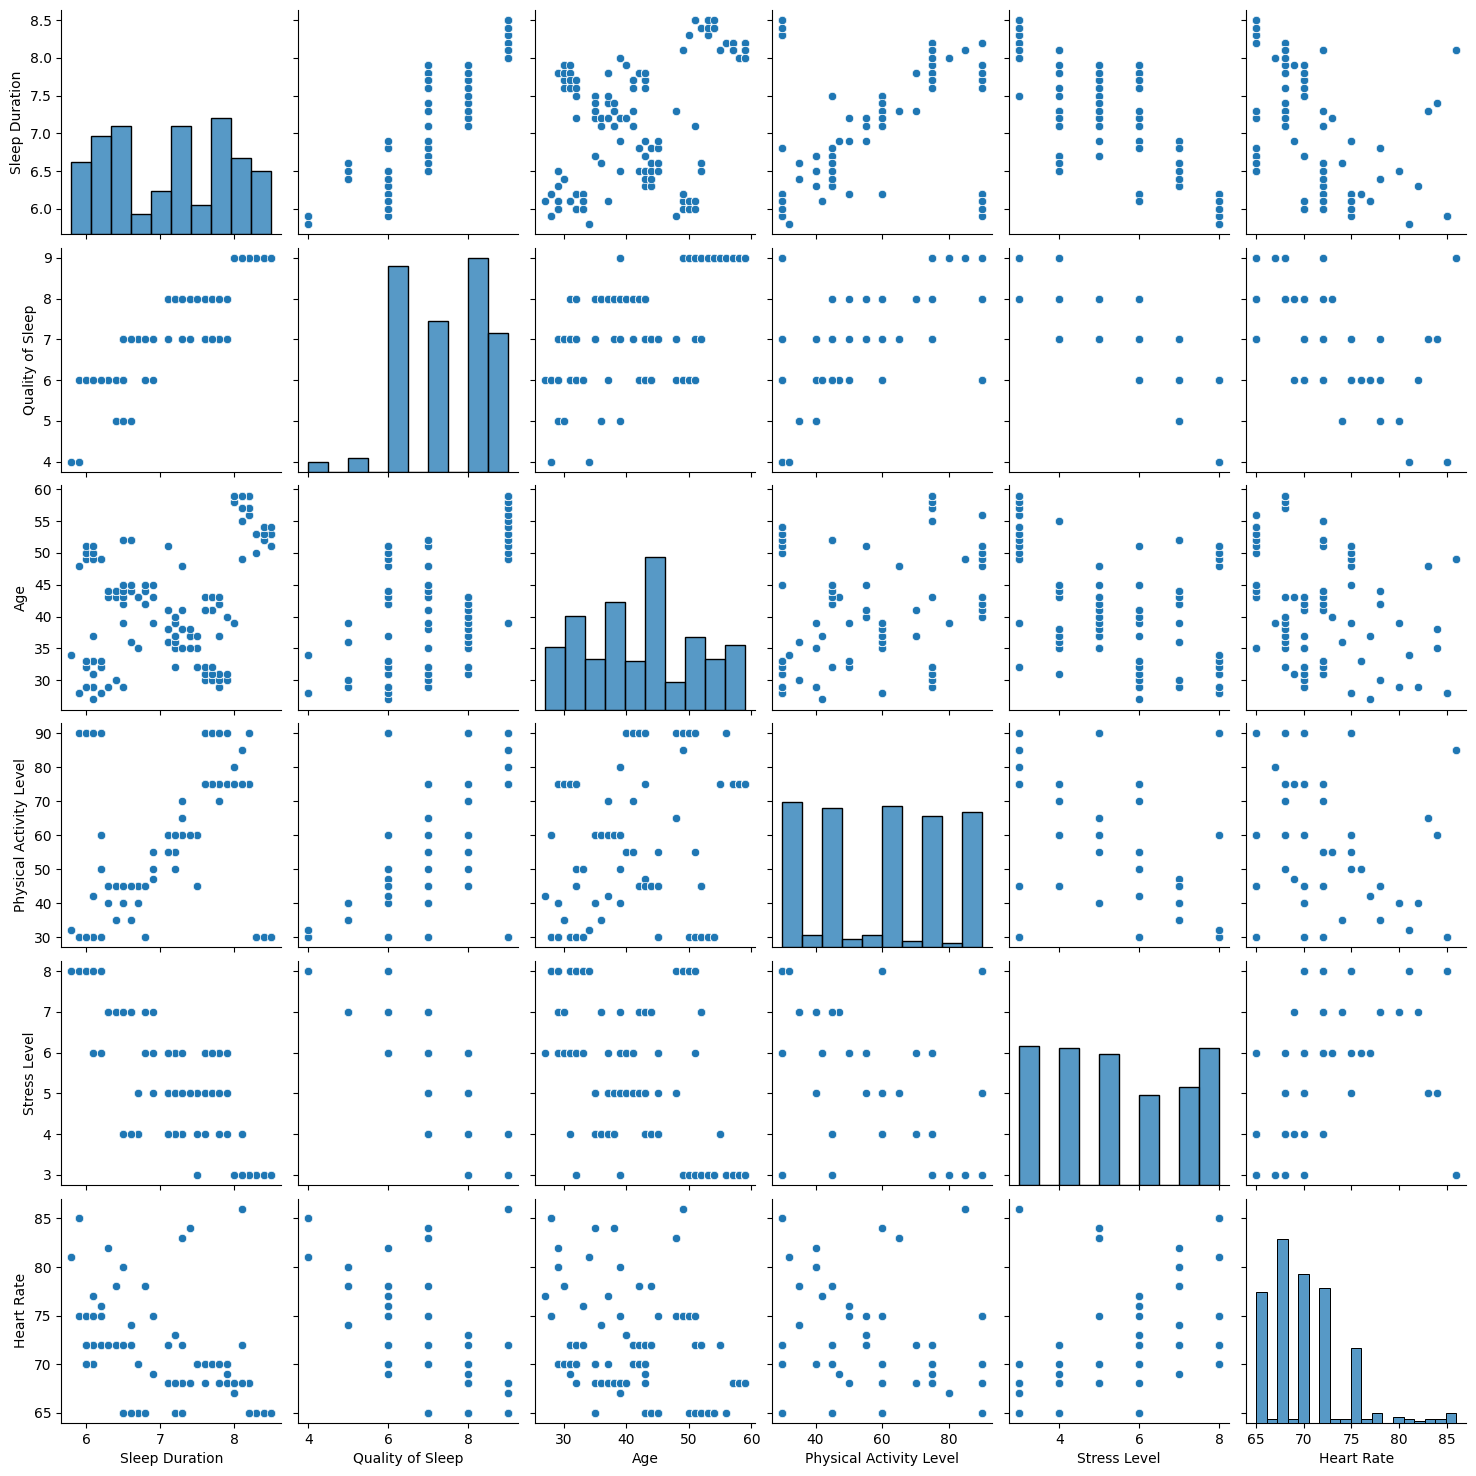

In [30]:
# Построение scatter plot matrix
plt.figure(figsize=(10, 10))
sns.pairplot(df[['Sleep Duration', 'Quality of Sleep', 'Age', 'Physical Activity Level', 'Stress Level',
               'Blood Pressure', 'Heart Rate', 'Sleep Disorder']])

plt.show()

# Чем старше человек, тем больше времени он уделяет на сон и тем выше у него качество сна

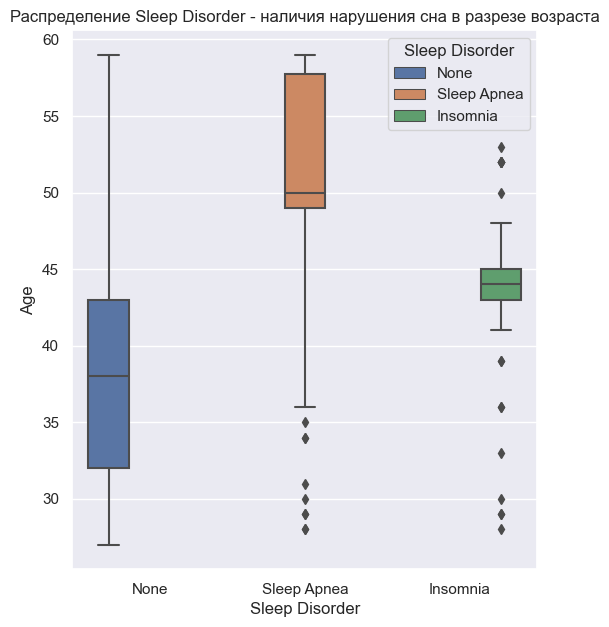

In [342]:
# построим распределение Sleep Disorder - наличия нарушения сна в разрезе возраста
plt.figure(figsize=(6, 7)) 
sns.boxplot(data=df, x="Sleep Disorder", y="Age", hue="Sleep Disorder", dodge=True)
plt.title('Распределение Sleep Disorder - наличия нарушения сна в разрезе возраста')
plt.show()

# чем старше человек, тем больше проблем со сном он испытывает

Вывод:   

1. Сон положительно влияет на состояние человека. Чем больше человек спит, тем меньше у него наблюдается уровень стресса и тем больше качество сна.

2. У людей более молодого возраста в среднем меньшая продолжительность сна, чем у людей более старшего возраста.

3. В то же время, более молодые не испытывают проблем со сном. У людей старше 45 лет, наблюдаются нарушения сна.

4. Отсутствует связь между физической активностью человека и остальными показателями, такими как продолжительность сна, уровень стресса.